In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\tejas\Documents\SportPersonClassifier


In [3]:
# Change the current working directory
new_working_directory = 'C:\Code\SportPersonClassifier\model'
os.chdir(new_working_directory)

In [4]:
# Now, the current working directory is set to the new directory
print("Current working directory:", os.getcwd())

Current working directory: C:\Code\SportPersonClassifier\model


In [5]:
img = cv2.imread('./GettyImages-1443064180.jpg')
img.shape

(1440, 2560, 3)

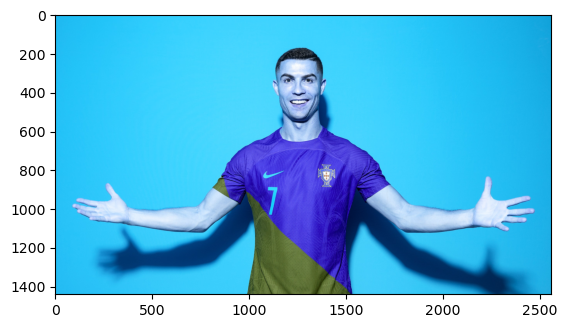

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1440, 2560)

In [8]:
gray

array([[183, 183, 184, ..., 161, 160, 160],
       [183, 184, 184, ..., 160, 160, 160],
       [183, 184, 184, ..., 163, 164, 164],
       ...,
       [187, 187, 188, ..., 173, 173, 173],
       [185, 186, 187, ..., 175, 175, 175],
       [184, 185, 186, ..., 172, 172, 173]], dtype=uint8)

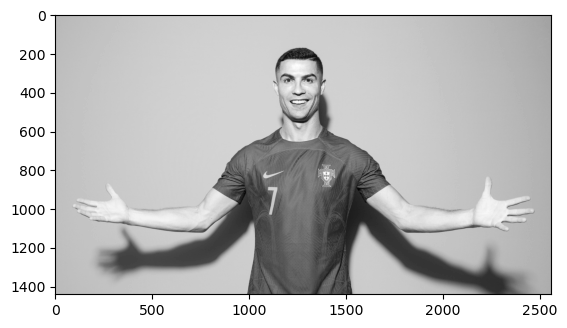

In [9]:
plt.imshow(gray, cmap='gray')

- **Haar Cascade**⇾ (Api) helps to detect various features of images

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5) # detect faces from image gray
faces

array([[1122,  234,  274,  274]])

In [11]:
(x, y, w, h) = faces[0]
x, y, w, h

(1122, 234, 274, 274)

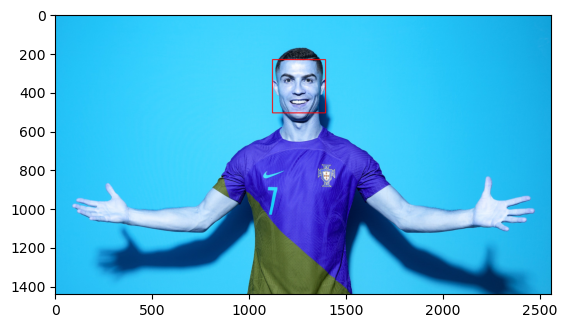

In [12]:
# show detected face using a rectangle from 'img'
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
plt.imshow(face_img)

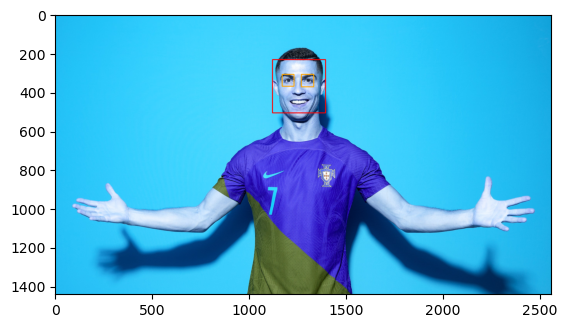

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    roi_gray = gray[y:y+h, x:x+w]                #region of interest
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255, 165, 0),3)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

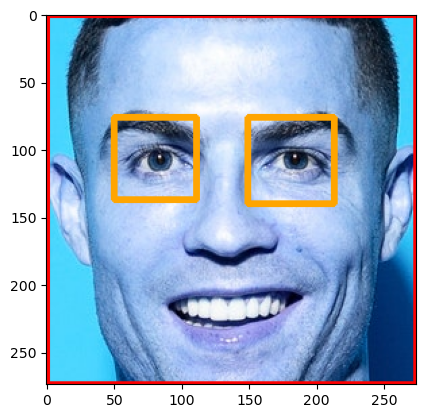

In [14]:
plt.imshow(roi_color, cmap='gray')

- A python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        # Handle case where image loading fails
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2:
            return roi_color

    # Return None if no suitable face with two eyes is found
    return None

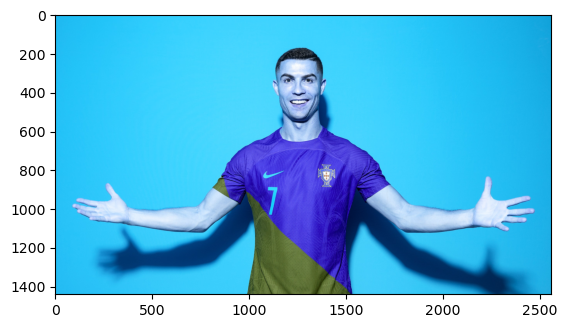

In [16]:
original_image = cv2.imread('./GettyImages-1443064180.jpg')
plt.imshow(original_image)

In [17]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Code\SportPersonClassifier\model\GettyImages-1443064180.jpg')
cropped_image

array([[[ 69, 213, 255],
        [ 69, 213, 255],
        [ 67, 213, 255],
        ...,
        [ 64, 212, 255],
        [ 64, 212, 255],
        [ 64, 212, 255]],

       [[ 69, 213, 255],
        [ 69, 213, 255],
        [ 67, 213, 255],
        ...,
        [ 64, 212, 255],
        [ 64, 212, 255],
        [ 64, 212, 255]],

       [[ 67, 213, 255],
        [ 67, 213, 255],
        [ 67, 213, 255],
        ...,
        [ 64, 212, 255],
        [ 64, 212, 255],
        [ 64, 212, 255]],

       ...,

       [[ 76, 215, 254],
        [ 76, 215, 254],
        [ 76, 215, 254],
        ...,
        [  3,  51, 115],
        [  1,  49, 113],
        [  0,  50, 113]],

       [[ 76, 215, 254],
        [ 76, 215, 254],
        [ 76, 215, 254],
        ...,
        [  2,  50, 114],
        [  2,  50, 114],
        [  0,  51, 114]],

       [[ 76, 215, 254],
        [ 76, 215, 254],
        [ 76, 215, 254],
        ...,
        [  2,  50, 114],
        [  3,  51, 115],
        [  0,  51, 114]]

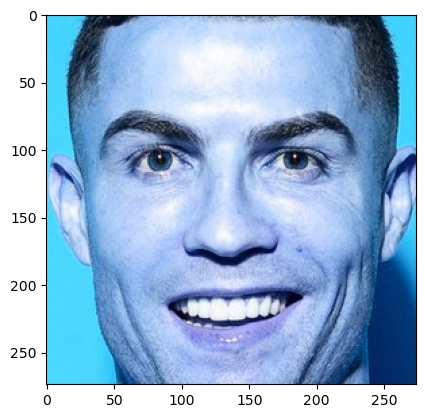

In [18]:
cropped_image = get_cropped_image_if_2_eyes('./GettyImages-1443064180.jpg')
plt.imshow(cropped_image)

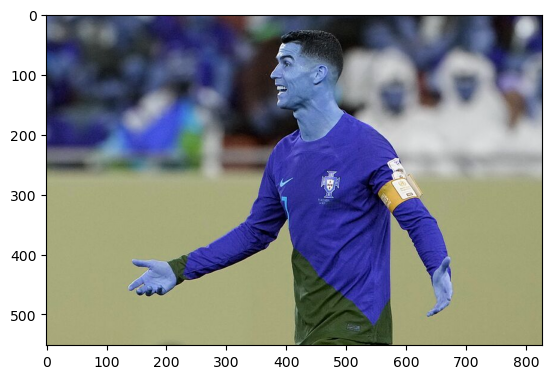

In [19]:
org_image_obstructed = cv2.imread('./16695216359764.jpg')
plt.imshow(org_image_obstructed)


In [20]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./16695216359764.jpg')
cropped_image_no_2_eyes

> - Returns NONE >> face in image is obstructed 

In [21]:
path_to_data = './dataset'
path_to_cr_data = './dataset/cropped'

In [22]:
img_dirs = []

# Iterate over entries in the specified directory
for entry in os.scandir(path_to_data):
    # Check if the entry is a directory
    if entry.is_dir():
        # Append the path of the directory to the img_dirs list
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./dataset\\cristiano_ronaldo',
 './dataset\\maria_sharapova',
 './dataset\\roger_federer',
 './dataset\\serena_williams',
 './dataset\\virat_kohli']

In [24]:
import shutil          
if os.path.exists(path_to_cr_data):                       #if there is cropped folder delete it and then create a new cropped folder
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)                           

In [25]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)

cristiano_ronaldo
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [27]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:

            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            # Normalize the path to handle any platform-specific quirks
            cropped_folder = os.path.normpath(cropped_folder)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  dataset\cropped\cristiano_ronaldo
Generating cropped images in folder:  dataset\cropped\maria_sharapova
Generating cropped images in folder:  dataset\cropped\roger_federer
Generating cropped images in folder:  dataset\cropped\serena_williams
Generating cropped images in folder:  dataset\cropped\virat_kohli


**Manually examine cropped folder and delete any unwanted images**

In [37]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = os.path.basename(img_dir)
    
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano_ronaldo': ['dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo1.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo10.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo11.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo12.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo13.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo14.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo15.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo16.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo17.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo18.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo19.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo2.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo20.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo21.png',
  'dataset\\cropped\\cristiano_ronaldo\\cristiano_ronaldo

In [38]:
import pickle

# Save celebrity_file_names_dict to a file
with open('celebrity_file_names_dict.pkl', 'wb') as file:
    pickle.dump(celebrity_file_names_dict, file)